In [1]:
from pyModelChecking import *
from pyModelChecking.CTLS import *
### Kripke Structure for a Giskard controller
controller = Kripke(S0=[0],
                    R=[(0, 1), (1, 2), (1, 3), (3, 4), (2, 0), (4, 4)],
                    L={0: {'jointGoal1'}, 1: {'jointGoal2'}, 2: {'onceMonitor'}, 3: {'localMinMonitor'}, 4: {'end'}})

In [9]:
# for every possible future path "end" will eventually be true
phi = A(U(True, 'end'))
print(phi)

E((true U end))


In [50]:
# there exist a path where 'end' will eventually hold
phi2 = E(F('jointGoal1'))
print(phi2)

EF jointGoal1


In [48]:
# For all paths 'collisionAvoidance' holds in the next state
phi3 = A(X('collisionAvoidance'))
print(phi3)

AX collisionAvoidance


In [61]:
controller = Kripke(S=[0, 1, 2, 3, 4, 5, 6, 7, 8],
                    S0=[0],
                    R=[(0, 1), (1, 2), (2, 3), (3, 7), (1, 4), (4, 5), (5, 5), (0, 6), (6, 6), (7, 8), (8, 8), (7, 1)],
                    L={0: {'position'}, 1: {'cut', 'down'}, 2: {'cut', 'up'}, 3: {'cut', 'move'}, 4: {'cut', 'contact'}, 5: {'cut', 'cancel'},
                       6: {'humanClose'}, 7: {'isDone'}, 8: {'end'}
                       })

In [3]:
# "On every possible future path, whenever the system is in a 'down' state, it must transition to an 'up' state in the very next step."
phi4 = A(Imply('up', X('right')))

In [68]:
# possible "natural" language description of the system
# todo: can that be transformed to logic expression
# todo: can that logic be checked with the current system model, or should that model be improved?
system_description = ('1.The knife should be positioned first to then cut down; '
                      '2.after cut down the knife should be moved up and then moved to the right for a new position; '
                      '3.This should be repeated until cutting the whole cucumber is done; '
                      '4.while cut down, contact with the table should be monitored and the motion canceled if that is to high; '
                      '5.the whole cutting motion should be paused when a human is close;')
phi1 = A(Imply('position', A(X('down'))))
print(phi1)
phi2 = A(Imply('down', X('up')))
print(phi2)
phi3 = A(Imply('up', X('move')))
print(phi3)
#phi4 = 

A((position --> A(X(down))))
A((down --> X(up)))
A((up --> X(move)))


In [69]:
modelcheck(controller, phi1)

{1, 2, 3, 4, 5, 6, 7, 8}

In [43]:
modelcheck(controller, And('move', 'cut'))

{3}

In [71]:
import networkx as nx
import matplotlib.pyplot as plt

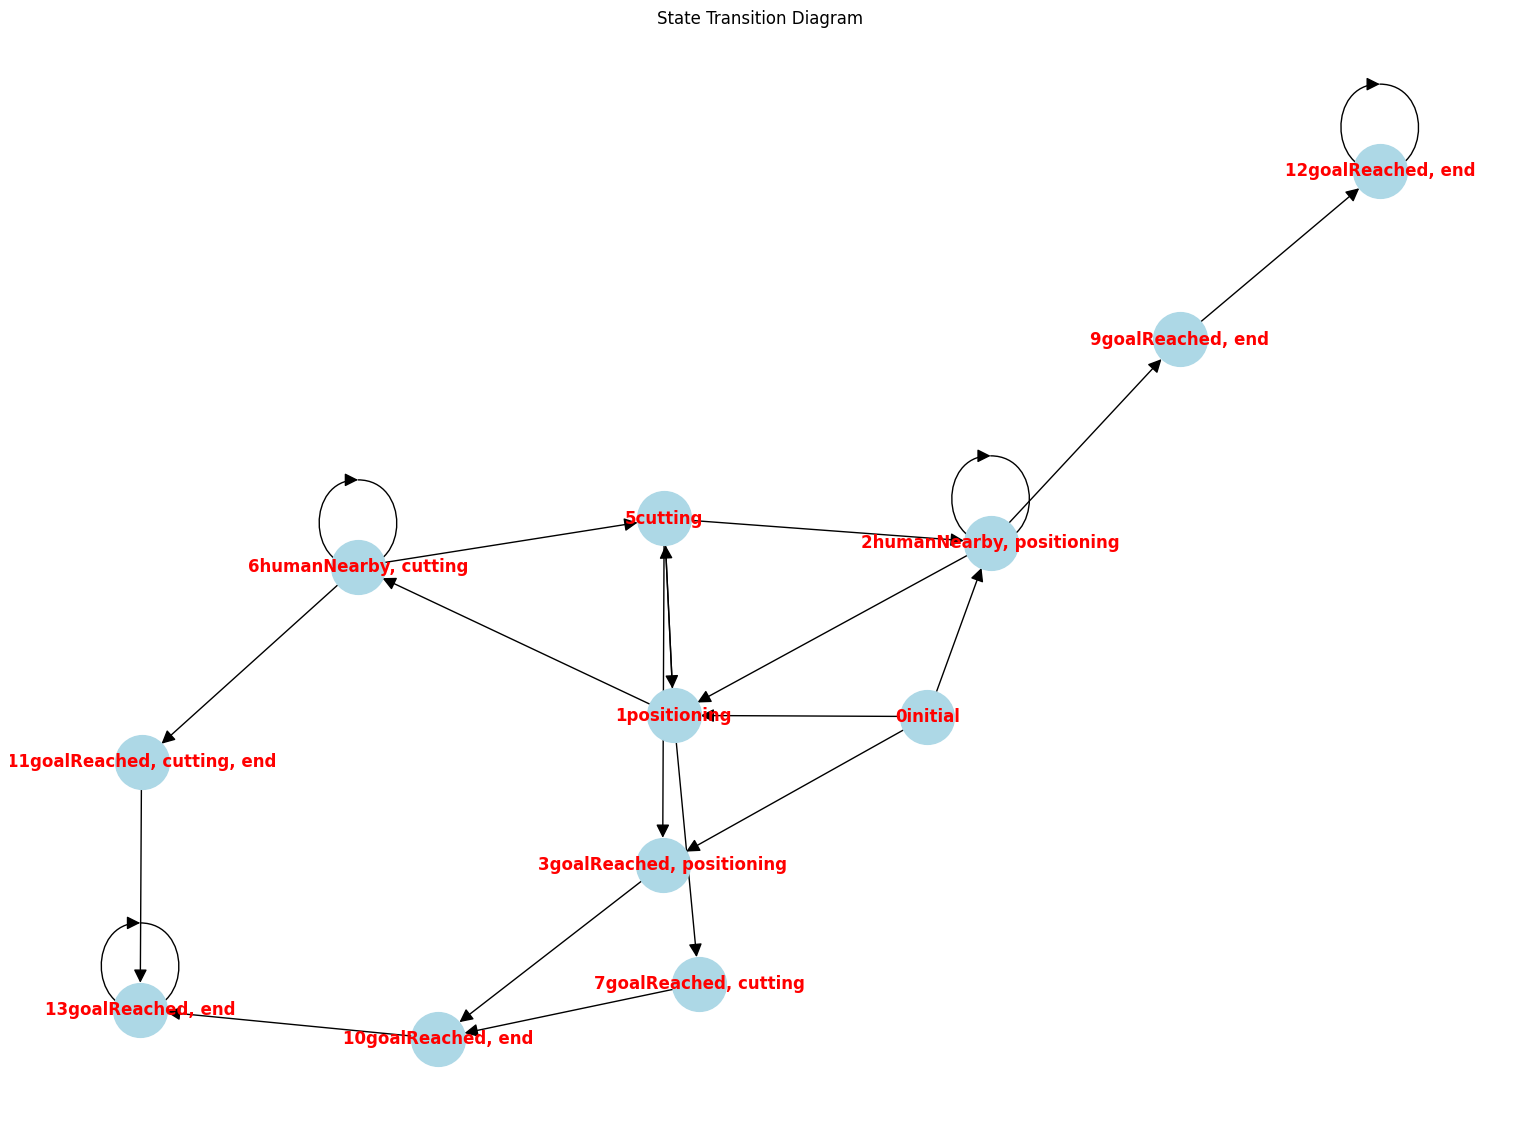

In [128]:
# First test controller
transitions = {
    0: [1, 2, 3, 4],
    1: [5, 6, 7, 8],
    2: [1, 2, 9, 4],
    3: [10],
    4: [],
    5: [1, 2, 3, 4],
    6: [5, 6, 11, 8],
    7: [10],
    8: [],
    9: [12],
    10: [13],
    11: [13],
    12: [12],
    13: [13]
}

labels = {
    0: '0initial',
    1: '1positioning',
    2: '2humanNearby, positioning',
    3: '3goalReached, positioning',
    4: '4goalReached, humanNearby, positioning',
    5: '5cutting',
    6: '6humanNearby, cutting',
    7: '7goalReached, cutting',
    8: '8goalReached, humanNearby, cutting',
    9: '9goalReached, end',
    10: '10goalReached, end',
    11: '11goalReached, cutting, end',
    12: '12goalReached, end',
    13: '13goalReached, end'
}
node_list = [x for x in transitions.keys() if len(transitions[x]) > 0]
out_nodes = [x for x in transitions.keys() if len(transitions[x]) == 0]
for n in out_nodes:
    labels.pop(n)
# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for state, successors in transitions.items():
    for succ in successors:
        G.add_edge(state, succ)

edge_list = [e for e in list(G.edges) if e[0] not in out_nodes and e[1] not in out_nodes]
# Draw the graph
plt.figure(figsize=(15, 11))
pos = nx.kamada_kawai_layout(G)  # Position the nodes
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=12, node_color="lightblue", arrowsize=20, labels=labels, font_weight='bold', font_color='red', nodelist=node_list, edgelist=edge_list)
#nx.draw_networkx_edges(G, pos, arrowstyle="->", arrows=True)
plt.title("State Transition Diagram")
plt.show()

In [123]:
len(edge_list)

22

In [124]:
len(G.edges)

27

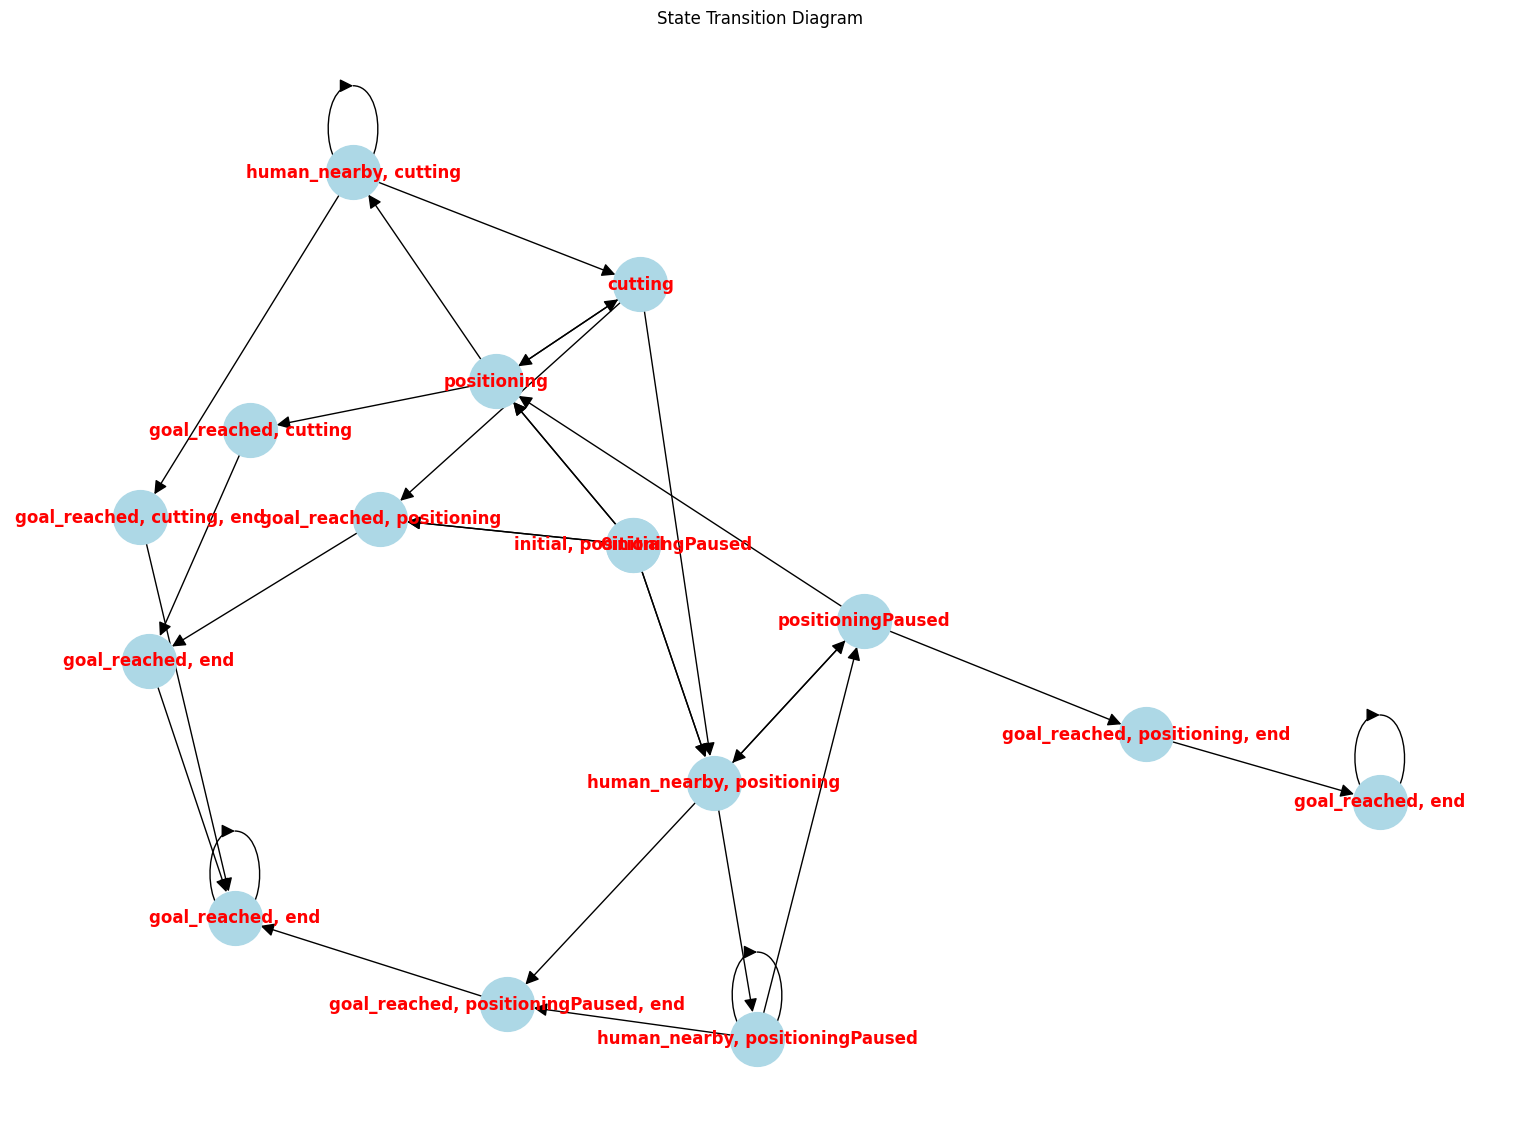

In [133]:
#controller2
transitions = {
    0: [2, 3, 4, 5],
    1: [2, 3, 4, 5],
    2: [6, 7, 8, 9],
    3: [10, 11, 12, 13],
    4: [14],
    5: [],
    6: [2, 3, 4, 5],
    7: [6, 7, 15, 9],
    8: [14],
    9: [],
    10: [2, 3, 16, 5],
    11: [10, 11, 12, 13],
    12: [17],
    13: [],
    14: [17],
    15: [17],
    16: [18],
    17: [17],
    18: [18]
}

labels = {
    0: '0initial',
    1: 'initial, positioningPaused',
    2: 'positioning',
    3: 'human_nearby, positioning',
    4: 'goal_reached, positioning',
    5: 'goal_reached, human_nearby, positioning',
    6: 'cutting',
    7: 'human_nearby, cutting',
    8: 'goal_reached, cutting',
    9: 'goal_reached, human_nearby, cutting',
    10: 'positioningPaused',
    11: 'human_nearby, positioningPaused',
    12: 'goal_reached, positioningPaused, end',
    13: 'goal_reached, human_nearby, positioningPaused',
    14: 'goal_reached, end',
    15: 'goal_reached, cutting, end',
    16: 'goal_reached, positioning, end',
    17: 'goal_reached, end',
    18: 'goal_reached, end'
}
node_list = [x for x in transitions.keys() if len(transitions[x]) > 0]
out_nodes = [x for x in transitions.keys() if len(transitions[x]) == 0]
for n in out_nodes:
    labels.pop(n)
# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for state, successors in transitions.items():
    for succ in successors:
        G.add_edge(state, succ)

edge_list = [e for e in list(G.edges) if e[0] not in out_nodes and e[1] not in out_nodes]
# Draw the graph
plt.figure(figsize=(15, 11))
pos = nx.kamada_kawai_layout(G)  # Position the nodes
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=12, node_color="lightblue", arrowsize=20, labels=labels, font_weight='bold', font_color='red', nodelist=node_list, edgelist=edge_list)
#nx.draw_networkx_edges(G, pos, arrowstyle="->", arrows=True)
plt.title("State Transition Diagram")
plt.show()

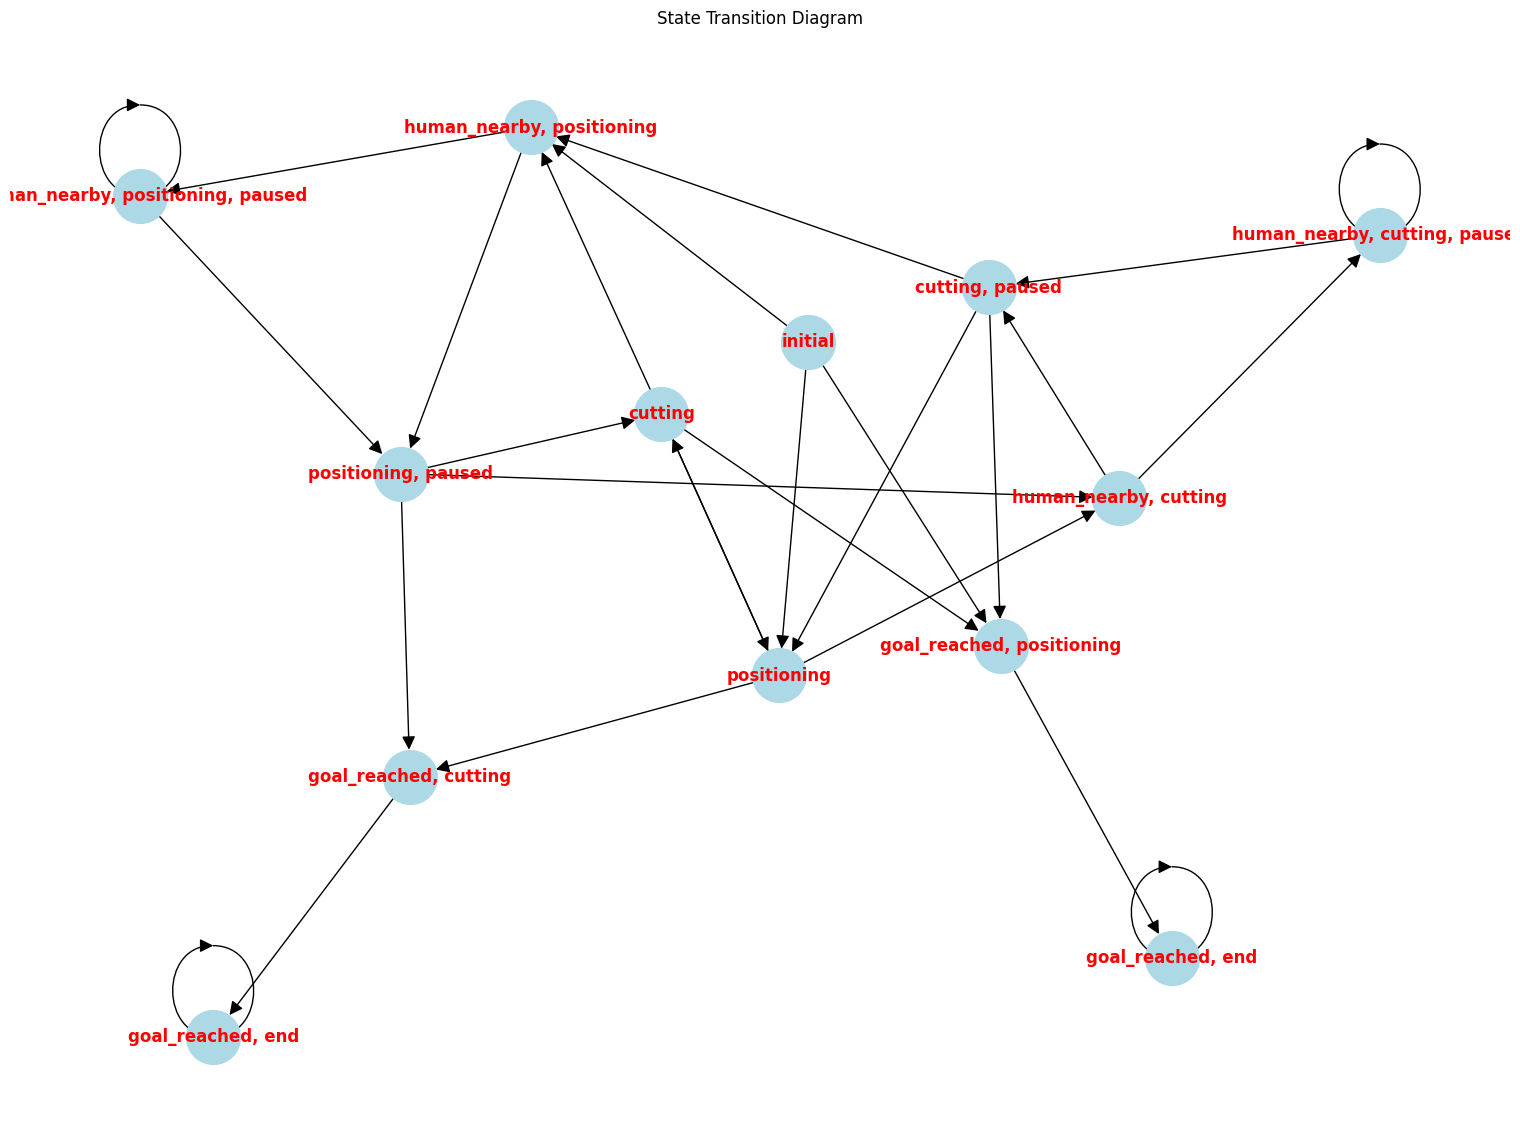

In [134]:
#third one
transitions = {
    0: [1, 2, 3, 4],
    1: [5, 6, 7, 8],
    2: [9, 10],
    3: [11],
    4: [],
    5: [1, 2, 3, 4],
    6: [12, 13],
    7: [14],
    8: [],
    9: [5, 6, 7, 8],
    10: [9, 10],
    11: [11],
    12: [1, 2, 3, 4],
    13: [12, 13],
    14: [14]
}

# Define the labels for each state based only on variables that are True
labels = {
    0: 'initial',
    1: 'positioning',
    2: 'human_nearby, positioning',
    3: 'goal_reached, positioning',
    4: 'goal_reached, human_nearby, positioning',
    5: 'cutting',
    6: 'human_nearby, cutting',
    7: 'goal_reached, cutting',
    8: 'goal_reached, human_nearby, cutting',
    9: 'positioning, paused',
    10: 'human_nearby, positioning, paused',
    11: 'goal_reached, end',
    12: 'cutting, paused',
    13: 'human_nearby, cutting, paused',
    14: 'goal_reached, end'
}
node_list = [x for x in transitions.keys() if len(transitions[x]) > 0]
out_nodes = [x for x in transitions.keys() if len(transitions[x]) == 0]
for n in out_nodes:
    labels.pop(n)
# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for state, successors in transitions.items():
    for succ in successors:
        G.add_edge(state, succ)

edge_list = [e for e in list(G.edges) if e[0] not in out_nodes and e[1] not in out_nodes]
# Draw the graph
plt.figure(figsize=(15, 11))
pos = nx.kamada_kawai_layout(G)  # Position the nodes
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=12, node_color="lightblue", arrowsize=20, labels=labels, font_weight='bold', font_color='red', nodelist=node_list, edgelist=edge_list)
#nx.draw_networkx_edges(G, pos, arrowstyle="->", arrows=True)
plt.title("State Transition Diagram")
plt.show()